In [1]:
import globsss
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import random
from time import sleep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Bidirectional
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

In [2]:
dirA='./Datasets/setA/'
tempA=[]
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)
dirE='./Datasets/setE/'
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
tempA

['./Datasets/setA/Z001.txt',
 './Datasets/setA/Z002.txt',
 './Datasets/setA/Z003.txt',
 './Datasets/setA/Z004.txt',
 './Datasets/setA/Z005.txt',
 './Datasets/setA/Z006.txt',
 './Datasets/setA/Z007.txt',
 './Datasets/setA/Z008.txt',
 './Datasets/setA/Z009.txt',
 './Datasets/setA/Z010.txt',
 './Datasets/setA/Z011.txt',
 './Datasets/setA/Z012.txt',
 './Datasets/setA/Z013.txt',
 './Datasets/setA/Z014.txt',
 './Datasets/setA/Z015.txt',
 './Datasets/setA/Z016.txt',
 './Datasets/setA/Z017.txt',
 './Datasets/setA/Z018.txt',
 './Datasets/setA/Z019.txt',
 './Datasets/setA/Z020.txt',
 './Datasets/setA/Z021.txt',
 './Datasets/setA/Z022.txt',
 './Datasets/setA/Z023.txt',
 './Datasets/setA/Z024.txt',
 './Datasets/setA/Z025.txt',
 './Datasets/setA/Z026.txt',
 './Datasets/setA/Z027.txt',
 './Datasets/setA/Z028.txt',
 './Datasets/setA/Z029.txt',
 './Datasets/setA/Z030.txt',
 './Datasets/setA/Z031.txt',
 './Datasets/setA/Z032.txt',
 './Datasets/setA/Z033.txt',
 './Datasets/setA/Z034.txt',
 './Datasets/s

In [4]:
tempE

['./Datasets/setE/S001.txt',
 './Datasets/setE/S002.txt',
 './Datasets/setE/S003.txt',
 './Datasets/setE/S004.txt',
 './Datasets/setE/S005.txt',
 './Datasets/setE/S006.txt',
 './Datasets/setE/S007.txt',
 './Datasets/setE/S008.txt',
 './Datasets/setE/S009.txt',
 './Datasets/setE/S010.txt',
 './Datasets/setE/S011.txt',
 './Datasets/setE/S012.txt',
 './Datasets/setE/S013.txt',
 './Datasets/setE/S014.txt',
 './Datasets/setE/S015.txt',
 './Datasets/setE/S016.txt',
 './Datasets/setE/S017.txt',
 './Datasets/setE/S018.txt',
 './Datasets/setE/S019.txt',
 './Datasets/setE/S020.txt',
 './Datasets/setE/S021.txt',
 './Datasets/setE/S022.txt',
 './Datasets/setE/S023.txt',
 './Datasets/setE/S024.txt',
 './Datasets/setE/S025.txt',
 './Datasets/setE/S026.txt',
 './Datasets/setE/S027.txt',
 './Datasets/setE/S028.txt',
 './Datasets/setE/S029.txt',
 './Datasets/setE/S030.txt',
 './Datasets/setE/S031.txt',
 './Datasets/setE/S032.txt',
 './Datasets/setE/S033.txt',
 './Datasets/setE/S034.txt',
 './Datasets/s

In [5]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [6]:
ta

[      A0
 0     12
 1     22
 2     35
 3     45
 4     69
 ...   ..
 4092 -25
 4093 -28
 4094 -11
 4095   8
 4096  77
 
 [4097 rows x 1 columns],
        A1
 0     -56
 1     -50
 2     -64
 3     -91
 4    -135
 ...   ...
 4092 -172
 4093 -180
 4094 -173
 4095 -162
 4096  -82
 
 [4097 rows x 1 columns],
       A2
 0    -37
 1    -22
 2    -17
 3    -24
 4    -31
 ...   ..
 4092  -3
 4093   7
 4094   3
 4095   4
 4096  82
 
 [4097 rows x 1 columns],
       A3
 0    -31
 1    -43
 2    -39
 3    -39
 4     -9
 ...   ..
 4092  11
 4093  12
 4094  -6
 4095  10
 4096  33
 
 [4097 rows x 1 columns],
       A4
 0     14
 1     26
 2     32
 3     25
 4     16
 ...   ..
 4092 -55
 4093 -58
 4094 -32
 4095  -6
 4096 -17
 
 [4097 rows x 1 columns],
       A5
 0    -87
 1    -89
 2    -73
 3    -69
 4    -51
 ...   ..
 4092  32
 4093  37
 4094  18
 4095   7
 4096   7
 
 [4097 rows x 1 columns],
       A6
 0     -2
 1     20
 2     42
 3     48
 4     27
 ...   ..
 4092 -38
 4093 -23
 4094 -18


In [7]:
te

[       A0
 0     100
 1     124
 2     153
 3     185
 4     210
 ...   ...
 4092    7
 4093   26
 4094   57
 4095   95
 4096  462
 
 [4097 rows x 1 columns],
        A1
 0     340
 1     353
 2     400
 3     470
 4     538
 ...   ...
 4092  829
 4093  722
 4094  512
 4095  130
 4096  196
 
 [4097 rows x 1 columns],
        A2
 0    -310
 1      93
 2     494
 3     789
 4     798
 ...   ...
 4092 -735
 4093 -847
 4094 -721
 4095 -491
 4096  910
 
 [4097 rows x 1 columns],
        A3
 0      84
 1      75
 2      21
 3     -68
 4    -138
 ...   ...
 4092 -234
 4093 -238
 4094 -209
 4095 -165
 4096 -212
 
 [4097 rows x 1 columns],
        A4
 0     343
 1     311
 2     284
 3     274
 4     260
 ...   ...
 4092  515
 4093  527
 4094  480
 4095  397
 4096  217
 
 [4097 rows x 1 columns],
        A5
 0     -88
 1    -115
 2    -140
 3    -159
 4    -164
 ...   ...
 4092  153
 4093  150
 4094  146
 4095  140
 4096  191
 
 [4097 rows x 1 columns],
        A6
 0     176
 1     186
 2     

In [8]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [9]:
bigA=table(ta)
bigE=table(te)

head=list(bigA.columns.values)

In [10]:
len(bigA.columns)

100

In [11]:
bigA

A0   A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  A90  A91  A92  A93  A94  \
0     12  -56 -37 -31  14 -87  -2 -31   8 -41  ...   13   40  -19  -45    6   
1     22  -50 -22 -43  26 -89  20 -16  17 -38  ...   30   48   -1  -62   -6   
2     35  -64 -17 -39  32 -73  42  10  29 -31  ...   42   35   33  -76   -8   
3     45  -91 -24 -39  25 -69  48  28  46 -25  ...   56    5   51  -98   -6   
4     69 -135 -31  -9  16 -51  27  31  50 -32  ...   56  -40   49 -108   15   
...   ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
4092 -25 -172  -3  11 -55  32 -38   0 -48  38  ...  -39  -40  -49   25   87   
4093 -28 -180   7  12 -58  37 -23   3 -50  22  ...  -39  -38  -71    9  103   
4094 -11 -173   3  -6 -32  18 -18   1 -40   1  ...  -36  -34  -70  -24   98   
4095   8 -162   4  10  -6   7  -6   1 -36 -13  ...  -22  -27  -25  -56   78   
4096  77  -82  82  33 -17   7 -37   0   7  -1  ...  -39  -42   -2   49   -5   

      A95  A96  A97  A98  A99  
0    -133   -3  -51   56  -36  
1    -144   -3  -42   55  -71  
2    -113  -12  -39   38 -120  
3     -74  -24  -47   -5 -150  
4     -41  -34  -51  -47 -160  
...   ...  ...  ...  ...  ...  
4092  -71   55   -9  -27   41  
4093  -79   42    2  -45   14  
4094  -83   30   -2  -32    3  
4095  -87   19    0   -4  -13  
4096 -104  -64  -49   69   30  

[4097 rows x 100 columns]

In [12]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [13]:
matA=creat_mat(bigA)
matE=creat_mat(bigE)

In [14]:
matA=np.nan_to_num(matA)
matE=np.nan_to_num(matE)

In [15]:
matA.shape,matE.shape

((4097, 100), (4097, 100))

In [16]:
matA

array([[  12.,  -56.,  -37., ...,  -51.,   56.,  -36.],
       [  22.,  -50.,  -22., ...,  -42.,   55.,  -71.],
       [  35.,  -64.,  -17., ...,  -39.,   38., -120.],
       ...,
       [ -11., -173.,    3., ...,   -2.,  -32.,    3.],
       [   8., -162.,    4., ...,    0.,   -4.,  -13.],
       [  77.,  -82.,   82., ...,  -49.,   69.,   30.]])

In [17]:
matE

array([[ 100.,  340., -310., ..., -438., -476.,   23.],
       [ 124.,  353.,   93., ..., -561., -518.,  144.],
       [ 153.,  400.,  494., ..., -622., -521.,  228.],
       ...,
       [  57.,  512., -721., ..., -118.,  246., -155.],
       [  95.,  130., -491., ..., -163.,  556.,    6.],
       [ 462.,  196.,  910., ...,  -56.,  276., -221.]])

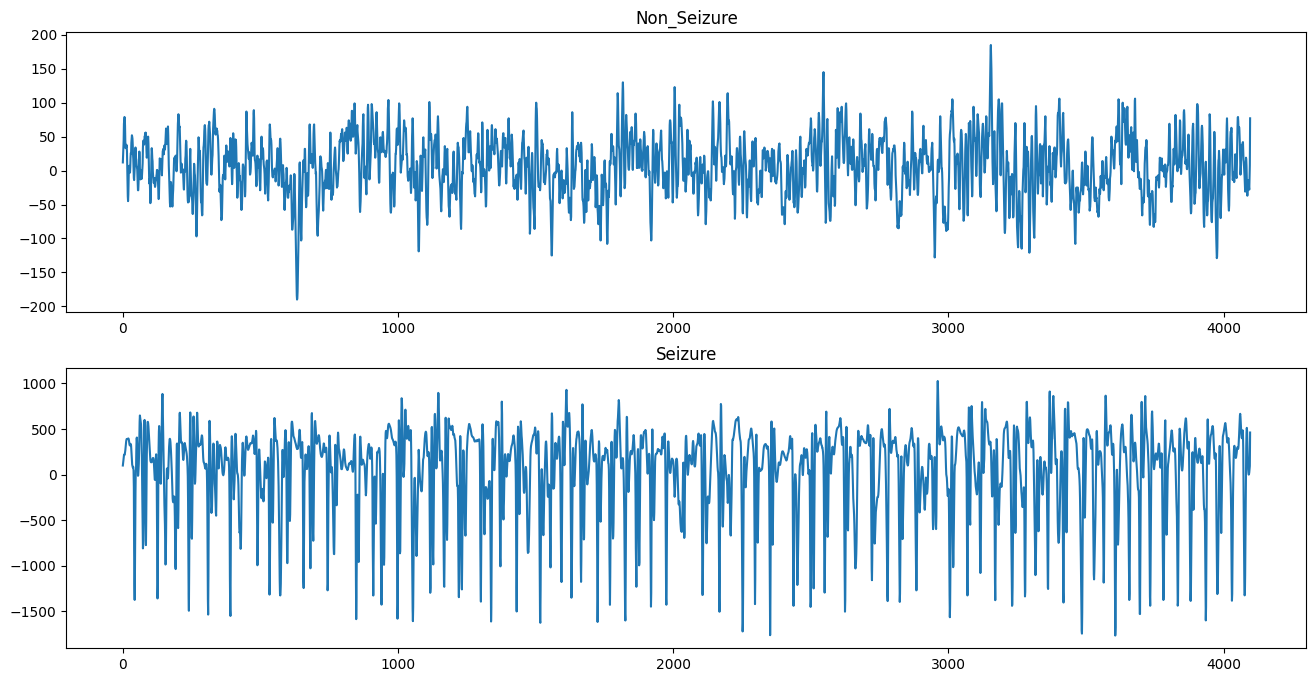

In [18]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Non_Seizure')
plt.plot(samples,matA[:,0],label='Non_Seizure')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label='Seizure')
plt.savefig('plot1.png')
plt.show()

In [19]:
feature_size = 8
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [20]:
def features(mat):
  Fs   = 173
  fft = np.fft.fft(mat)
  mat = np.fft.ifft(fft[0:1500])
  mat = abs(np.fft.ifft(fft[0:1000]))
  lis = list()
  lis = lis + [np.max(abs(fft))]
  lis = lis + [np.min(abs(fft))]
  lis = lis + [np.mean(abs(fft))]
  lis = lis + [np.std(abs(fft))]
  lis = lis + [np.max(mat)]
  lis = lis + [np.min(mat)]
  lis = lis + [np.mean(mat)]
  lis = lis + [np.std(mat)]
  sleep(0.01)
             
  return lis

In [21]:
MftA = np.zeros((100,feature_size + 1))
for i in range(100):
    MftA[i,:] = features(matA[:,i]) + [1]

In [22]:
MftE = np.zeros((100,feature_size + 1))
for i in range(100):
    MftE[i,:] = features(matE[:,i]) + [0]

In [23]:
len(MftA),len(MftE)

(100, 100)

In [24]:
FCM_A = pd.DataFrame(MftA,columns=columns_name)
FCM_E = pd.DataFrame(MftE,columns=columns_name)

In [25]:
TotalDataset = pd.concat([FCM_A,FCM_E],ignore_index=True)

In [26]:
TotalDataset

f1         f2            f3            f4           f5  \
0     27927.000000   1.804001   1306.891142   2431.919518   402.671072   
1    214866.000000   3.676425   1671.932564   4270.252159   608.727553   
2     52053.000000   1.686932   1449.913086   2768.612115   417.530621   
3     17599.744070  16.933319   1773.067008   2449.424909   385.370119   
4     73743.000000   7.626801   1430.247438   2746.877731   435.671590   
..             ...        ...           ...           ...          ...   
195  182731.000000   4.140197   2964.034370   6900.671072   949.526909   
196  405933.567827  23.829796  12451.110052  33118.177387  3365.057684   
197  206553.768555  13.807308   7000.972903  17431.403312  1554.877011   
198  186015.216714  22.248840  12069.225734  21179.101425  3292.508700   
199  128700.862108  12.661965   6980.974726  15056.067510  2296.802283   

             f6           f7          f8  class  
0      4.683998   111.494796   59.500225    1.0  
1     27.437399   239.483060   93.593039    1.0  
2      3.368915   128.570237   69.166958    1.0  
3      2.077735   119.681376   65.604141    1.0  
4      5.824369   132.431131   68.939573    1.0  
..          ...          ...         ...    ...  
195    7.628541   321.787517  169.284739    0.0  
196  584.042975  1497.708540  566.344367    0.0  
197   70.801519   785.302431  325.527149    0.0  
198   22.389188   897.583539  643.899324    0.0  
199   30.885310   673.746341  331.607715    0.0  

[200 rows x 9 columns]

In [27]:
x = TotalDataset[columns_name[:-1]]
y = TotalDataset[['class']]
x = np.asarray(x)
y = np.asarray(y)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train) 

In [30]:
x_test= st_x.transform(x_test)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8)
(40, 8)
(160, 1)
(40, 1)


In [32]:
x_train=x_train.reshape(x_train.shape[0],8,1)
y_train=y_train.reshape(y_train.shape[0],1)
x_test=x_test.reshape(x_test.shape[0],8,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8, 1)
(40, 8, 1)
(160, 1)
(40, 1)


In [34]:
batch_size=20
nb_epoch=200
hidden_size=64
use_dropout=True

model=Sequential()
model.add(LSTM(hidden_size,input_shape=(8,1)))

if use_dropout:
    model.add(Dropout(0.50))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

print(model.summary())

history=model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=nb_epoch)
score=model.evaluate(x_test,y_test,batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
7/7 [==============================] - 10s 247ms/step - loss: 0.6793 - acc: 0.5703 - val_loss: 0.6105 - val_acc: 0.9688
Epoch 2/200
7/7 [==============================

7/7 [==============================] - 0s 18ms/step - loss: 0.0083 - acc: 0.9922 - val_loss: 2.9887e-04 - val_acc: 1.0000
Epoch 119/200
7/7 [==============================] - 0s 21ms/step - loss: 0.0158 - acc: 0.9922 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 120/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0050 - acc: 1.0000 - val_loss: 9.0851e-04 - val_acc: 1.0000
Epoch 121/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 6.2057e-04 - val_acc: 1.0000
Epoch 122/200
7/7 [==============================] - 0s 18ms/step - loss: 0.0031 - acc: 1.0000 - val_loss: 3.9740e-04 - val_acc: 1.0000
Epoch 123/200
7/7 [==============================] - 0s 21ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 5.3411e-04 - val_acc: 1.0000
Epoch 124/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 5.0548e-04 - val_acc: 1.0000
Epoch 125/200
7/7 [==============================] - 0s 16ms/step 

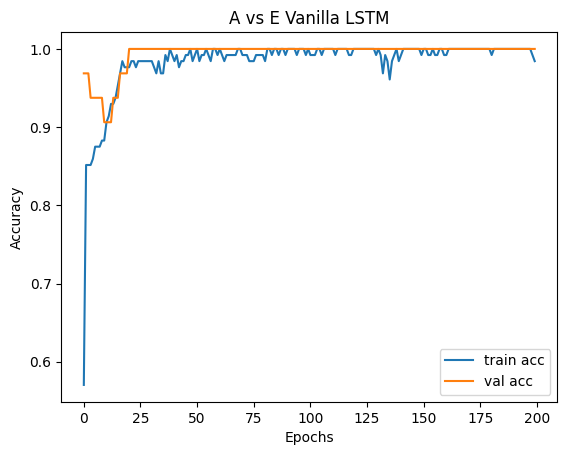

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('A vs E Vanilla LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc','val acc'],loc='best')
plt.savefig('Accuracy.png')
plt.show()

In [36]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%


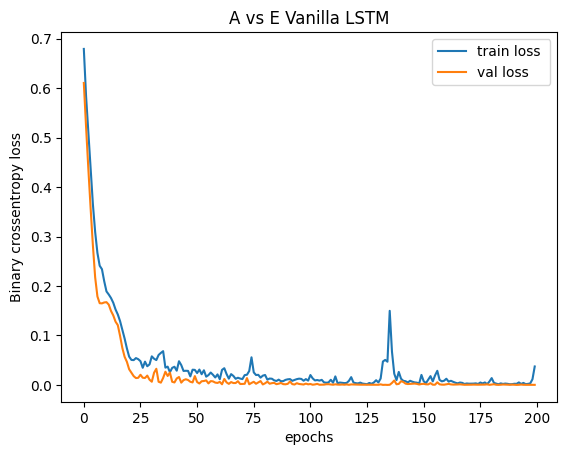

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('A vs E Vanilla LSTM')
plt.xlabel('epochs')
plt.ylabel('Binary crossentropy loss')
plt.legend(['train loss ','val loss'],loc='best')
plt.savefig('Loss.png')
plt.show()

In [38]:
model1 = Sequential()
model1.add(LSTM(128, input_shape=(8,1),activation='relu', return_sequences=True))
model1.add(Dropout(0.4))
model1.add(LSTM(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 8, 128)            66560     
                                                                 
 dropout_1 (Dropout)         (None, 8, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
history = model1.fit(x_train, y_train, validation_split=0.2, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
5/5 [==============================] - 4s 195ms/step - loss: 0.6794 - acc: 0.7250 - val_loss: 0.6629 - val_acc: 0.8250
Epoch 2/100
5/5 [==============================] - 0s 32ms/step - loss: 0.6454 - acc: 0.8562 - val_loss: 0.6295 - val_acc: 0.8250
Epoch 3/100
5/5 [==============================] - 0s 36ms/step - loss: 0.5877 - acc: 0.8750 - val_loss: 0.5711 - val_acc: 0.8250
Epoch 4/100
5/5 [==============================] - 0s 32ms/step - loss: 0.5013 - acc: 0.8750 - val_loss: 0.4634 - val_acc: 0.8250
Epoch 5/100
5/5 [==============================] - 0s 33ms/step - loss: 0.3546 - acc: 0.8938 - val_loss: 0.3260 - val_acc: 0.8000
Epoch 6/100
5/5 [==============================] - 0s 32ms/step - loss: 0.2091 - acc: 0.8938 - val_loss: 0.3227 - val_acc: 0.9000
Epoch 7/100
5/5 [==============================] - 0s 48ms/step - loss: 0.1815 - acc: 0.9250 - val_loss: 0.3349 - val_acc: 0.9000
Epoch 8/100
5/5 [==============================] - 0s 39ms/step - loss: 0.2247 - acc: 0.9

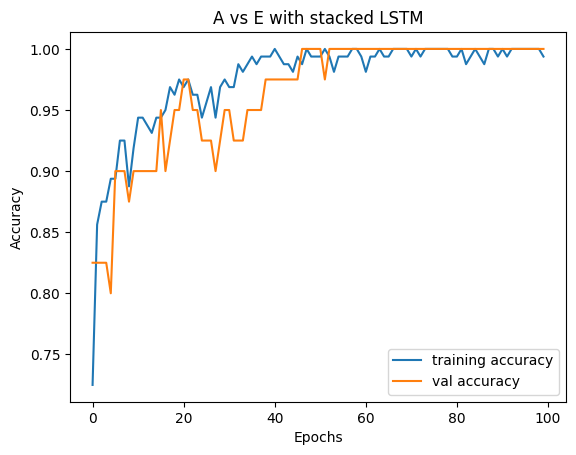

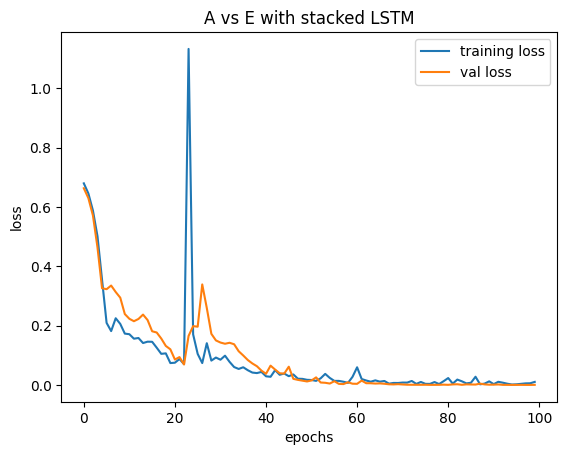

In [40]:
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('A vs E with stacked LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('A vs E with stacked LSTM')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [41]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%


In [42]:
model2 = Sequential()
model2.add(Bidirectional(LSTM(200, activation='relu', input_shape=(8,1))))
model2.add(RepeatVector(2))
model2.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True)))
model2.add(TimeDistributed(Dense(1,activation='sigmoid')))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [43]:
history=model2.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
5/5 [==============================] - 9s 488ms/step - loss: 0.6659 - acc: 0.8000 - val_loss: 0.6417 - val_acc: 0.8000
Epoch 2/100
5/5 [==============================] - 0s 85ms/step - loss: 0.5860 - acc: 0.8750 - val_loss: 0.5444 - val_acc: 0.8000
Epoch 3/100
5/5 [==============================] - 0s 87ms/step - loss: 0.4235 - acc: 0.8938 - val_loss: 0.3414 - val_acc: 0.8375
Epoch 4/100
5/5 [==============================] - 0s 93ms/step - loss: 0.2166 - acc: 0.9062 - val_loss: 0.3130 - val_acc: 0.8750
Epoch 5/100
5/5 [==============================] - 0s 75ms/step - loss: 0.1957 - acc: 0.9156 - val_loss: 0.2608 - val_acc: 0.9250
Epoch 6/100
5/5 [==============================] - 0s 74ms/step - loss: 0.1451 - acc: 0.9312 - val_loss: 0.2022 - val_acc: 0.9500
Epoch 7/100
5/5 [==============================] - 0s 108ms/step - loss: 0.1322 - acc: 0.9594 - val_loss: 0.1759 - val_acc: 0.9500
Epoch 8/100
5/5 [==============================] - 0s 74ms/step - loss: 0.1251 - acc: 0.

Epoch 62/100
5/5 [==============================] - 0s 90ms/step - loss: 2.5610e-05 - acc: 1.0000 - val_loss: 4.6829e-05 - val_acc: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 80ms/step - loss: 2.4379e-05 - acc: 1.0000 - val_loss: 4.2886e-05 - val_acc: 1.0000
Epoch 64/100
5/5 [==============================] - 0s 89ms/step - loss: 2.2463e-05 - acc: 1.0000 - val_loss: 4.0846e-05 - val_acc: 1.0000
Epoch 65/100
5/5 [==============================] - 0s 87ms/step - loss: 2.0887e-05 - acc: 1.0000 - val_loss: 3.8095e-05 - val_acc: 1.0000
Epoch 66/100
5/5 [==============================] - 0s 87ms/step - loss: 1.9370e-05 - acc: 1.0000 - val_loss: 3.5386e-05 - val_acc: 1.0000
Epoch 67/100
5/5 [==============================] - 0s 94ms/step - loss: 1.8588e-05 - acc: 1.0000 - val_loss: 3.2726e-05 - val_acc: 1.0000
Epoch 68/100
5/5 [==============================] - 0s 89ms/step - loss: 1.7328e-05 - acc: 1.0000 - val_loss: 3.0393e-05 - val_acc: 1.0000
Epoch 69/100
5/5 [=========

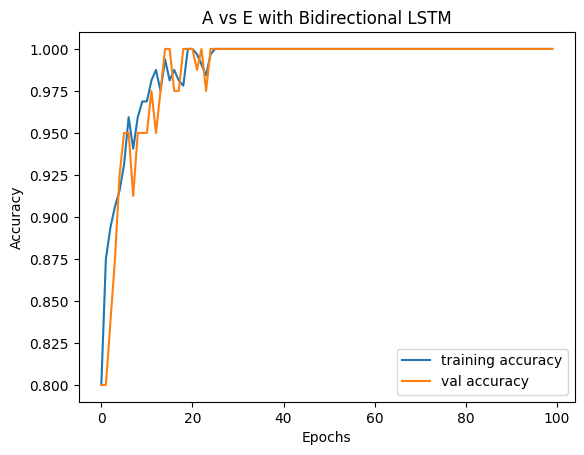

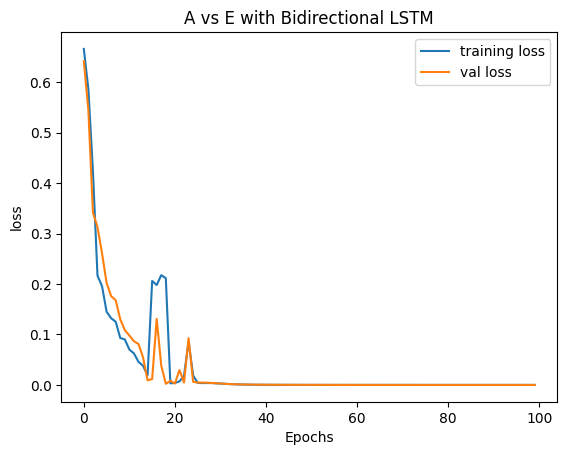

In [44]:
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('A vs E with Bidirectional LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('A vs E with Bidirectional LSTM')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%


In [93]:
dirC='./Datasets/setC/'
tempC=[]
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)


In [94]:
tempC

['./Datasets/setC/N001.TXT',
 './Datasets/setC/N002.TXT',
 './Datasets/setC/N003.TXT',
 './Datasets/setC/N004.TXT',
 './Datasets/setC/N005.TXT',
 './Datasets/setC/N006.TXT',
 './Datasets/setC/N007.TXT',
 './Datasets/setC/N008.TXT',
 './Datasets/setC/N009.TXT',
 './Datasets/setC/N010.TXT',
 './Datasets/setC/N011.TXT',
 './Datasets/setC/N012.TXT',
 './Datasets/setC/N013.TXT',
 './Datasets/setC/N014.TXT',
 './Datasets/setC/N015.TXT',
 './Datasets/setC/N016.TXT',
 './Datasets/setC/N017.TXT',
 './Datasets/setC/N018.TXT',
 './Datasets/setC/N019.TXT',
 './Datasets/setC/N020.TXT',
 './Datasets/setC/N021.TXT',
 './Datasets/setC/N022.TXT',
 './Datasets/setC/N023.TXT',
 './Datasets/setC/N024.TXT',
 './Datasets/setC/N025.TXT',
 './Datasets/setC/N026.TXT',
 './Datasets/setC/N027.TXT',
 './Datasets/setC/N028.TXT',
 './Datasets/setC/N029.TXT',
 './Datasets/setC/N030.TXT',
 './Datasets/setC/N031.TXT',
 './Datasets/setC/N032.TXT',
 './Datasets/setC/N033.TXT',
 './Datasets/setC/N034.TXT',
 './Datasets/s

In [72]:
tc=[]
st = 'C'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)

In [73]:
tc

[      C0
 0    -42
 1    -39
 2    -35
 3    -35
 4    -36
 ...   ..
 4092 -22
 4093 -29
 4094 -37
 4095 -40
 4096 -64
 
 [4097 rows x 1 columns],
       C1
 0     50
 1     48
 2     45
 3     41
 4     47
 ...   ..
 4092 -25
 4093 -19
 4094 -14
 4095  -9
 4096 -37
 
 [4097 rows x 1 columns],
       C2
 0    -54
 1    -56
 2    -57
 3    -63
 4    -60
 ...   ..
 4092 -43
 4093 -33
 4094 -38
 4095 -42
 4096   5
 
 [4097 rows x 1 columns],
       C3
 0      9
 1     -2
 2     -9
 3    -17
 4    -18
 ...   ..
 4092  70
 4093  72
 4094  67
 4095  65
 4096 -31
 
 [4097 rows x 1 columns],
        C4
 0     -76
 1     -10
 2      31
 3      44
 4       7
 ...   ...
 4092  185
 4093  245
 4094  209
 4095  150
 4096  -51
 
 [4097 rows x 1 columns],
        C5
 0    -148
 1    -155
 2    -156
 3    -156
 4    -150
 ...   ...
 4092  -81
 4093  -80
 4094  -81
 4095  -77
 4096   95
 
 [4097 rows x 1 columns],
       C6
 0    -27
 1    -26
 2    -19
 3    -13
 4     -8
 ...   ..
 4092 -79
 4093 -8

In [74]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [75]:
bigC=table(tc)

head=list(bigC.columns.values)

In [76]:
len(bigC.columns)

100

In [77]:
bigC

C0  C1  C2  C3   C4   C5  C6  C7  C8  C9  ...  C90  C91  C92  C93  C94  \
0    -42  50 -54   9  -76 -148 -27 -64  74 -41  ...    7 -108  -11  133   38   
1    -39  48 -56  -2  -10 -155 -26 -73  92 -35  ...   30 -120   -9  129   56   
2    -35  45 -57  -9   31 -156 -19 -79  94 -28  ...   16 -137  -11  124   75   
3    -35  41 -63 -17   44 -156 -13 -78  99 -23  ...   10 -132   -8  102   85   
4    -36  47 -60 -18    7 -150  -8 -80  91 -20  ...   17 -113   -4   99   83   
...   ..  ..  ..  ..  ...  ...  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...   
4092 -22 -25 -43  70  185  -81 -79 -36  -4   8  ...  -98   82   13  -24  -49   
4093 -29 -19 -33  72  245  -80 -82 -31 -17   8  ...  -52   68   14    4  -53   
4094 -37 -14 -38  67  209  -81 -78 -34 -11   2  ...  -33   26    9   26  -52   
4095 -40  -9 -42  65  150  -77 -72 -39 -14  -7  ...  -58   -3   13   37  -54   
4096 -64 -37   5 -31  -51   95 -10 -53  -9  28  ...  -12  -40   -1   25   61   

      C95  C96  C97  C98  C99  
0     -92  -82  -11   13  -62  
1     -85  -82  -23   22  -64  
2     -68  -83  -22   29  -62  
3     -67  -82  -31   38  -59  
4     -99  -79  -30   41  -57  
...   ...  ...  ...  ...  ...  
4092    8  -78   21  -83    1  
4093   -3  -72   22  -67    1  
4094  -20  -73   16  -55   -1  
4095  -16  -65   13  -46    0  
4096   92  -66  -29   -2   41  

[4097 rows x 100 columns]

In [78]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [79]:
matC=creat_mat(bigC)

In [80]:
matC=np.nan_to_num(matC)

In [81]:
matC.shape,matE.shape

((4097, 100), (4097, 100))

In [82]:
matC

array([[-42.,  50., -54., ..., -11.,  13., -62.],
       [-39.,  48., -56., ..., -23.,  22., -64.],
       [-35.,  45., -57., ..., -22.,  29., -62.],
       ...,
       [-37., -14., -38., ...,  16., -55.,  -1.],
       [-40.,  -9., -42., ...,  13., -46.,   0.],
       [-64., -37.,   5., ..., -29.,  -2.,  41.]])

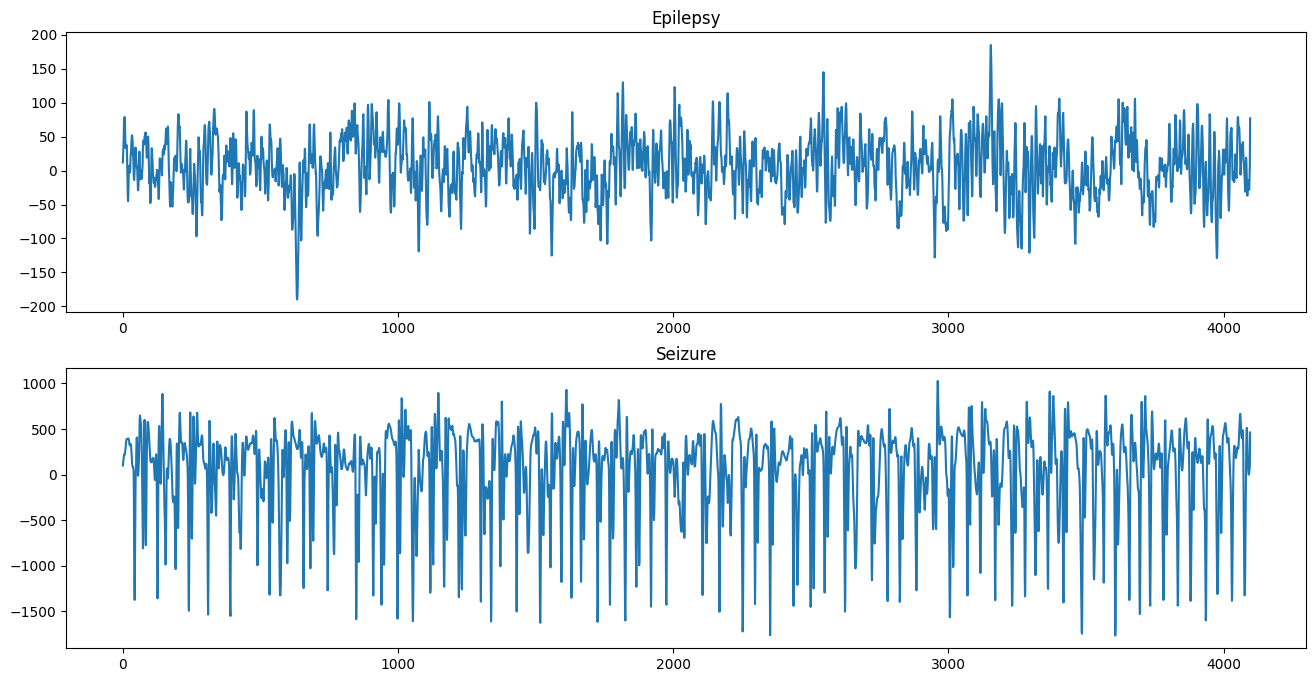

In [83]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Epilepsy')
plt.plot(samples,matA[:,0],label='Non_Seizure')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label='Seizure')
plt.savefig('plot1.png')
plt.show()

In [84]:
feature_size = 8
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [85]:
def features(mat):
  Fs   = 173
  fft = np.fft.fft(mat)
  mat = np.fft.ifft(fft[0:1500])
  mat = abs(np.fft.ifft(fft[0:1000]))
  lis = list()
  lis = lis + [np.max(abs(fft))]
  lis = lis + [np.min(abs(fft))]
  lis = lis + [np.mean(abs(fft))]
  lis = lis + [np.std(abs(fft))]
  lis = lis + [np.max(mat)]
  lis = lis + [np.min(mat)]
  lis = lis + [np.mean(mat)]
  lis = lis + [np.std(mat)]
  sleep(0.01)
             
  return lis

In [89]:
MftC = np.zeros((100,feature_size + 1))
for i in range(100):
    MftC[i,:] = features(matC[:,i]) + [1]

In [90]:
len(MftC),len(MftE)

(100, 100)

In [91]:
FCM_C = pd.DataFrame(MftC,columns=columns_name)

In [95]:
TotalDataset1 = pd.concat([FCM_C,FCM_E],ignore_index=True)

In [96]:
TotalDataset1

f1         f2            f3            f4           f5  \
0     72886.000000   4.740101   1162.631842   3148.603055   515.780251   
1     44488.190982   5.245204   1574.842502   3976.913262   782.890148   
2     60280.000000   3.558463   1187.368357   2836.556431   442.146657   
3    114634.000000   2.802925   1178.967729   3257.123132   516.340677   
4     73980.472922  29.009750   3844.764474   7038.394713  1321.432376   
..             ...        ...           ...           ...          ...   
195  182731.000000   4.140197   2964.034370   6900.671072   949.526909   
196  405933.567827  23.829796  12451.110052  33118.177387  3365.057684   
197  206553.768555  13.807308   7000.972903  17431.403312  1554.877011   
198  186015.216714  22.248840  12069.225734  21179.101425  3292.508700   
199  128700.862108  12.661965   6980.974726  15056.067510  2296.802283   

             f6           f7          f8  class  
0      3.827455   139.383073   79.320372    1.0  
1      6.272206   165.048007  101.066014    1.0  
2      2.203469   125.845383   72.975137    1.0  
3      4.296319   158.979411   76.421653    1.0  
4     12.411132   319.865458  171.761400    1.0  
..          ...          ...         ...    ...  
195    7.628541   321.787517  169.284739    0.0  
196  584.042975  1497.708540  566.344367    0.0  
197   70.801519   785.302431  325.527149    0.0  
198   22.389188   897.583539  643.899324    0.0  
199   30.885310   673.746341  331.607715    0.0  

[200 rows x 9 columns]

In [97]:
x = TotalDataset[columns_name[:-1]]
y = TotalDataset[['class']]
x = np.asarray(x)
y = np.asarray(y)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [100]:
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train) 

In [101]:
x_test= st_x.transform(x_test)

In [102]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 8)
(50, 8)
(150, 1)
(50, 1)


In [103]:
x_train=x_train.reshape(x_train.shape[0],8,1)
y_train=y_train.reshape(y_train.shape[0],1)
x_test=x_test.reshape(x_test.shape[0],8,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [104]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 8, 1)
(50, 8, 1)
(150, 1)
(50, 1)


In [119]:
batch_size=20
nb_epoch=200
hidden_size=64
use_dropout=True

model3=Sequential()
model3.add(LSTM(hidden_size,input_shape=(8,1)))

if use_dropout:
    model.add(Dropout(0.50))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

print(model3.summary())

history=model3.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=nb_epoch)
score=model3.evaluate(x_test,y_test,batch_size=batch_size)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
6/6 [==============================] - 4s 205ms/step - loss: 0.6436 - acc: 0.8500 - val_loss: 0.6009 - val_acc: 0.9667
Epoch 2/200
6/6 [==============================] - 0s 19ms/step - loss: 0.5773 - acc: 0.8500 - val_loss: 0.5328 - val_acc: 0.9667
Epoch 3/200
6/6 [==============================]

6/6 [==============================] - 0s 26ms/step - loss: 0.0772 - acc: 0.9750 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 120/200
6/6 [==============================] - 0s 23ms/step - loss: 0.0766 - acc: 0.9750 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 121/200
6/6 [==============================] - 0s 21ms/step - loss: 0.0789 - acc: 0.9833 - val_loss: 0.0060 - val_acc: 1.0000
Epoch 122/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0765 - acc: 0.9750 - val_loss: 0.0085 - val_acc: 1.0000
Epoch 123/200
6/6 [==============================] - 0s 23ms/step - loss: 0.0756 - acc: 0.9750 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 124/200
6/6 [==============================] - 0s 22ms/step - loss: 0.0765 - acc: 0.9750 - val_loss: 0.0086 - val_acc: 1.0000
Epoch 125/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0780 - acc: 0.9750 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 126/200
6/6 [==============================] - 0s 22ms/step - loss: 0.0752 - acc: 0.

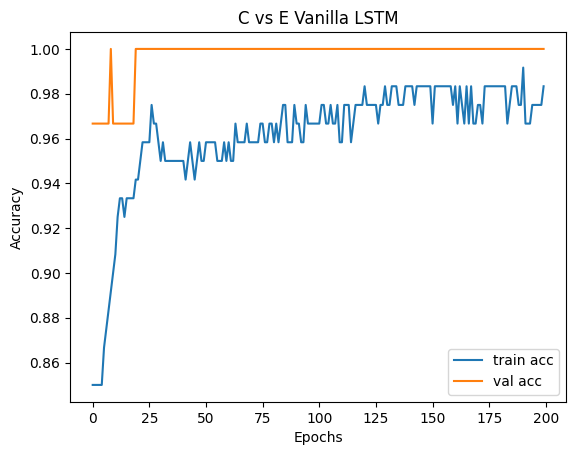

In [120]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('C vs E Vanilla LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc','val acc'],loc='best')
plt.savefig('Accuracy.png')
plt.show()

In [121]:
scores = model3.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.00%


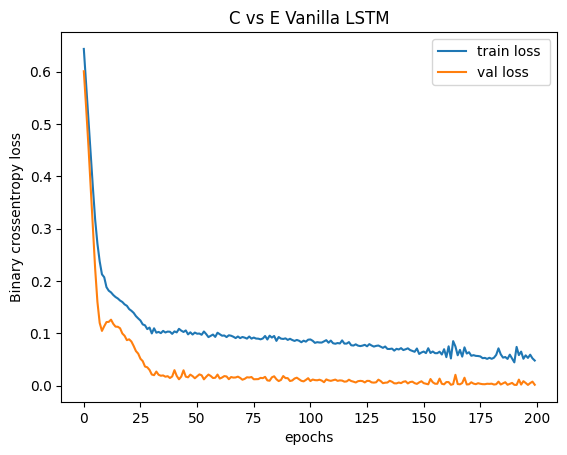

In [122]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('C vs E Vanilla LSTM')
plt.xlabel('epochs')
plt.ylabel('Binary crossentropy loss')
plt.legend(['train loss ','val loss'],loc='best')
plt.savefig('Loss.png')
plt.show()

In [123]:
model11 = Sequential()
model11.add(LSTM(128, input_shape=(8,1),activation='relu', return_sequences=True))
model11.add(Dropout(0.4))
model11.add(LSTM(64, activation='relu'))
model11.add(Dropout(0.5))
model11.add(Dense(1, activation='sigmoid'))
model11.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])
print(model11.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 8, 128)            66560     
                                                                 
 dropout_7 (Dropout)         (None, 8, 128)            0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________
None


In [124]:
history = model11.fit(x_train, y_train, validation_split=0.2, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
5/5 [==============================] - 6s 212ms/step - loss: 0.6874 - acc: 0.6733 - val_loss: 0.6731 - val_acc: 0.8200
Epoch 2/100
5/5 [==============================] - 0s 41ms/step - loss: 0.6515 - acc: 0.8733 - val_loss: 0.6419 - val_acc: 0.8200
Epoch 3/100
5/5 [==============================] - 0s 38ms/step - loss: 0.6040 - acc: 0.8800 - val_loss: 0.5904 - val_acc: 0.8200
Epoch 4/100
5/5 [==============================] - 0s 41ms/step - loss: 0.5175 - acc: 0.9000 - val_loss: 0.4927 - val_acc: 0.8200
Epoch 5/100
5/5 [==============================] - 0s 43ms/step - loss: 0.3679 - acc: 0.9000 - val_loss: 0.3566 - val_acc: 0.8000
Epoch 6/100
5/5 [==============================] - 0s 42ms/step - loss: 0.2159 - acc: 0.9067 - val_loss: 0.4022 - val_acc: 0.8400
Epoch 7/100
5/5 [==============================] - 0s 48ms/step - loss: 0.1854 - acc: 0.9333 - val_loss: 0.5970 - val_acc: 0.8800
Epoch 8/100
5/5 [==============================] - 0s 37ms/step - loss: 0.1858 - acc: 0.9

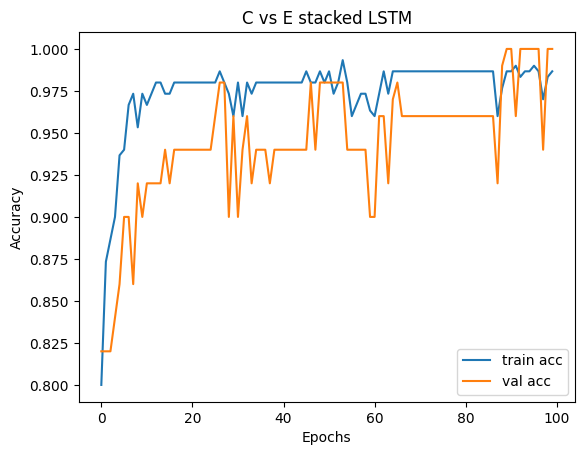

In [140]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('C vs E stacked LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc','val acc'],loc='best')
plt.savefig('Accuracy.png')
plt.show()

In [141]:
scores = model11.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.00%


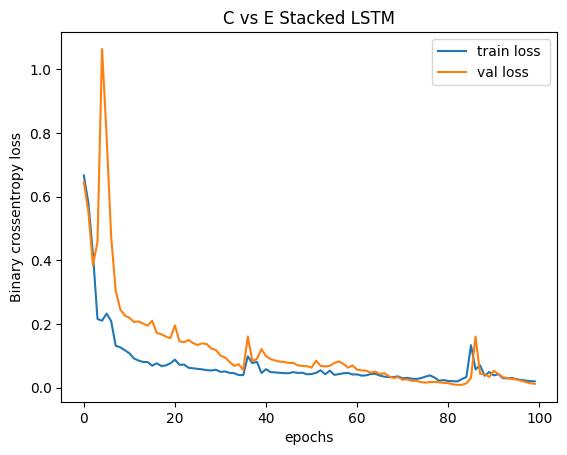

In [148]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('C vs E Stacked LSTM')
plt.xlabel('epochs')
plt.ylabel('Binary crossentropy loss')
plt.legend(['train loss ','val loss'],loc='best')
plt.savefig('Loss.png')
plt.show()

In [143]:
model22 = Sequential()
model22.add(Bidirectional(LSTM(200, activation='relu', input_shape=(8,1))))
model22.add(RepeatVector(2))
model22.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True)))
model22.add(TimeDistributed(Dense(1,activation='sigmoid')))
model22.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [144]:
history=model22.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
5/5 [==============================] - 10s 376ms/step - loss: 0.6663 - acc: 0.8267 - val_loss: 0.6447 - val_acc: 0.8000
Epoch 2/100
5/5 [==============================] - 0s 83ms/step - loss: 0.5803 - acc: 0.8867 - val_loss: 0.5523 - val_acc: 0.8200
Epoch 3/100
5/5 [==============================] - 0s 83ms/step - loss: 0.4198 - acc: 0.9000 - val_loss: 0.3850 - val_acc: 0.8200
Epoch 4/100
5/5 [==============================] - 0s 84ms/step - loss: 0.2158 - acc: 0.9167 - val_loss: 0.4567 - val_acc: 0.8400
Epoch 5/100
5/5 [==============================] - 0s 83ms/step - loss: 0.2102 - acc: 0.9333 - val_loss: 1.0633 - val_acc: 0.9000
Epoch 6/100
5/5 [==============================] - 0s 86ms/step - loss: 0.2325 - acc: 0.9567 - val_loss: 0.7906 - val_acc: 0.9000
Epoch 7/100
5/5 [==============================] - 0s 86ms/step - loss: 0.2091 - acc: 0.9600 - val_loss: 0.4740 - val_acc: 0.8800
Epoch 8/100
5/5 [==============================] - 0s 86ms/step - loss: 0.1316 - acc: 0.

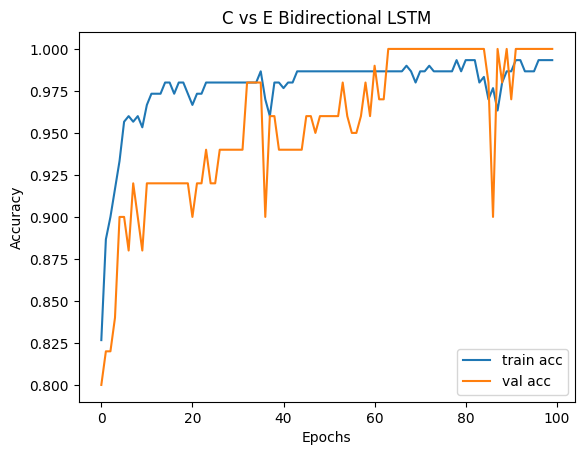

In [145]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('C vs E Bidirectional LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc','val acc'],loc='best')
plt.savefig('Accuracy.png')
plt.show()

In [146]:
scores = model22.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%


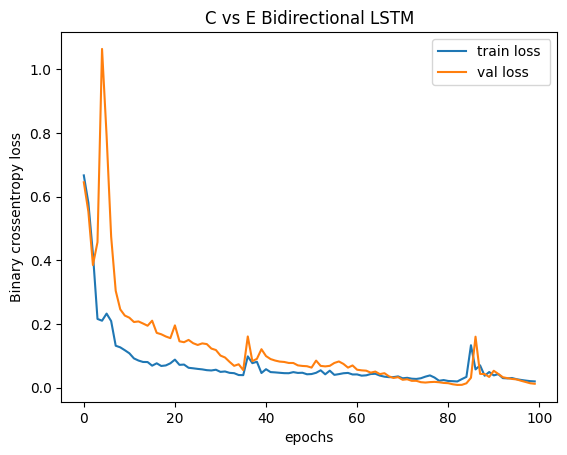

In [147]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('C vs E Bidirectional LSTM')
plt.xlabel('epochs')
plt.ylabel('Binary crossentropy loss')
plt.legend(['train loss ','val loss'],loc='best')
plt.savefig('Loss.png')
plt.show()